In [2]:
import pandas as pd

# Path to your text file
text_file_path = '/content/SMSSpamCollection.txt'
xlsx_file_path = '/content/ham_spam.xlsx'

# Read the text file into a DataFrame
# Assuming tab-delimited file
df = pd.read_csv(text_file_path, delimiter='\t', header=None, names=['label', 'message'])

# Save the DataFrame to an Excel file
df.to_excel(xlsx_file_path, index=False, engine='openpyxl')


In [3]:
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline
# Load data
data = pd.read_excel('/content/ham_spam.xlsx')
# Rename names columns
data.columns = ['label', 'messages']

In [4]:
data

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data["length"] = data["messages"].apply(len)
data.sort_values(by='length', ascending=False).head(10)

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

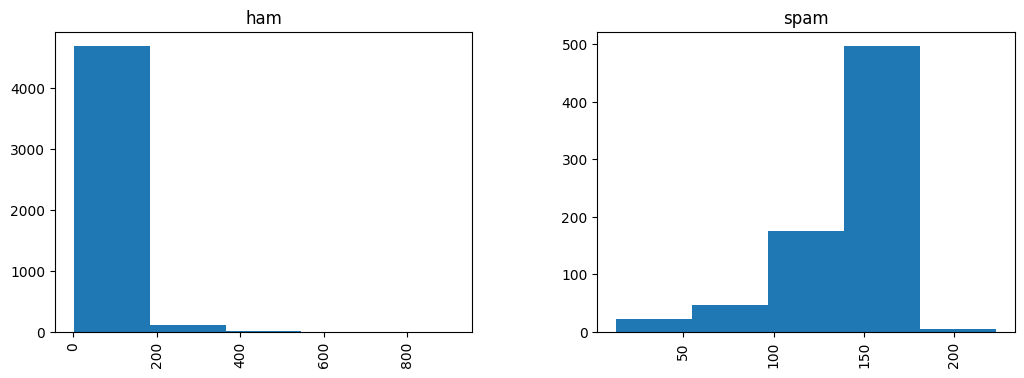

In [8]:
#Note that through the histogram, we have been able to discover that spam messages tend to have more characters.
data.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [13]:
#remove punctuations and stopwords

def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc)

    # Remove any stopwords for message_not_punc, but first we should
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [15]:
!pip install stopwords
from nltk.corpus import stopwords

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
data['messages'].apply(transform_message)

,messages
0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, t..."
...,...
5567,"[2nd, time, tried, 2, contact, u, U, £750, Pou..."
5568,"[ü, b, going, esplanade, fr, home]"
5569,"[Pity, , mood, Soany, suggestions]"
5570,"[guy, bitching, acted, like, id, interested, b..."


In [22]:
#Note that, we have the messages as lists of tokens. So, the next step is to convert each of those messages into a vector.

#To do that, we use CountVectorizer from Scikit Learn. CountVectorizer converts a collection of documents to an array of token counts.

from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorization = CountVectorizer(analyzer = transform_message )
X = vectorization.fit(data['messages'])

In [ ]:
X_transform = X.transform([data['messages']])

In [ ]:
tfidf_transformer = TfidfTransformer().fit(X_transform)

In [ ]:
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['label'], test_size=0.30, random_state = 50)
clf = SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print('predicted', predictions)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))